# **Techgig Code gladiator**

---



---



##Machine Learning - Online Hackathon
Conversion fraud in Digital Advertising

##Without using click log data

##**Input important libraries**

In [487]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import pandas as pd

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#**Reading training data**(with useful columns which dont have much null values)

In [488]:
dfo=pd.read_csv("/content/drive/MyDrive/New folder (7)/Training Data.csv",usecols=['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'])

In [489]:
#columns in train data
dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [490]:
dfo.head()

,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,2.869316,5488088,49504155,1.0,2320,34,4140.0,6384,16,196058.0,129639.0,436.0,1806.0,202038.0,264496,280429.0,144.0,199452.0,1.0,348011.0,348022.0,348007.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,2.790000,5488773,49504157,1.0,15240,178,663.0,6384,16,196058.0,129639.0,10314.0,1817.0,202038.0,264496,136127.0,144.0,199452.0,1.0,348011.0,348024.0,348010.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,2.790000,5488088,49504160,1.0,2320,34,4144.0,6384,16,196058.0,129639.0,0.0,1812.0,202038.0,264503,172725.0,144.0,199452.0,1.0,348011.0,348027.0,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,2.790000,5488088,49504155,1.0,2320,34,4140.0,6384,16,196058.0,129639.0,10300.0,1815.0,202038.0,264496,136127.0,144.0,199452.0,1.0,348011.0,348023.0,348007.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,5614054,53607445,1.0,1,3296,NaN,3370,17,129311.0,129408.0,0.0,1818.0,0.0,264496,136127.0,144.0,360833.0,1.0,348011.0,348025.0,NaN,True


In [491]:
#shape of training data
dfo.shape

(965, 28)

# Reading click log data(will use if it improves acuracy)

In [492]:
dfn=pd.read_csv("/content/drive/MyDrive/data/click_log.csv")

In [493]:
dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [494]:
len(dfo.columns)

28

In [495]:
dfn.head()

,imprid_cr,clmbuserid_cr,adslotdimid_cr,audiences_cr,allAudiences_cr,itemid_cr,algo_cr,clientid_cr,pubclientid_cr,itemcolumbiaid_cr,templateid_cr,clickbid_cr,position_cr,siteId_cr,pricingtype_cr,uuidSource_cr,countryDimId_cr,geoGrpDimId_cr,cityId_cr,cityGrpDimId_cr,stateId_cr,stateGrpDimId_cr,ispDimId_cr,osId_cr,osVerDimId_cr,modelDimId_cr,connTypeDimId_cr,browserId_cr,conversion_fraud
0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,13.10040,0,16,6.0,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,202038,264494,129639,NaN
1,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,4.58514,1,3290,16.0,1,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,202038,264496,129639,NaN
2,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,4.58514,159934117,3,16.0,1,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,202038,264496,129639,NaN
3,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,5.09460,1,3290,16.0,1,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,202038,264496,129639,NaN
4,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,4.58514,1,178,16.0,1,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,202038,264494,129639,NaN


In [496]:
dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [497]:
len(dfo.columns)

28

In [498]:
dfn.columns

Index(['imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'audiences_cr',
       'allAudiences_cr', 'itemid_cr', 'algo_cr', 'clientid_cr',
       'pubclientid_cr', 'itemcolumbiaid_cr', 'templateid_cr', 'clickbid_cr',
       'position_cr', 'siteId_cr', 'pricingtype_cr', 'uuidSource_cr',
       'countryDimId_cr', 'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr',
       'stateId_cr', 'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr',
       'osVerDimId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'browserId_cr',
       'conversion_fraud'],
      dtype='object')

In [499]:
len(dfn.columns)

29

## Reading test data(will make changes as the changes will be made in train data)

In [500]:
dftest=pd.read_csv("/content/drive/MyDrive/New folder (7)/Test Data.csv",usecols=['record_id', 'clientid_cr', 'clmbuserid_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr',
       'itemid_cr', 'position_cr', 'pubclientid_cr', 'siteId_cr',
       'templateid_cr', 'goalid_cr', 'pricingtype_cr', 'osId_cr',
       'browserId_cr', 'cityId_cr', 'stateId_cr', 'modelDimId_cr',
       'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'])

In [501]:
dftest.head()

,record_id,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494,265618,145,0,1,348012,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.1,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.1,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0


In [502]:
dftest.columns

Index(['record_id', 'clientid_cr', 'clmbuserid_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr',
       'itemid_cr', 'position_cr', 'pubclientid_cr', 'siteId_cr',
       'templateid_cr', 'goalid_cr', 'pricingtype_cr', 'osId_cr',
       'browserId_cr', 'cityId_cr', 'stateId_cr', 'modelDimId_cr',
       'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'],
      dtype='object')

In [503]:
len(dftest.columns)

28

Dropping Record id will add later to make submission file

In [504]:

dftest.drop(['record_id'], axis = 1)


,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494,265618,145,0,1,348012,NaN,NaN
1,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.10,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
2,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.10,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496,280429,144,199414,1,348011,348020.0,348006.0
3,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
4,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496,280429,144,360833,1,348011,348025.0,348010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,75694,d7b5dfcb-b5ea-4862-8e47-5d775c568b00-6m6g,ff755b7d-00a4-426a-835c-ddf7f56af2b3-10o78,332783,20,3.10,5488773,49504155,181581299,2658,3,4376.0,6384,16,196058,129639,0,1808,202038,264494,266906,144,199452,1,348011,348020.0,NaN
451,75694,81b2e0f3-ba16-4f1d-ba54-cbb18ab54dca-1sjac,ff89a128-e0b9-4dcd-9a3f-257dff9e4dd5-10o78,129239,20,NaN,5488773,49504157,1,15240,178,663.0,6384,16,129300,129639,438,1818,202038,264494,133765,144,199522,1,348011,348025.0,348009.0
452,75694,9453538d-3c8a-4e9b-aff3-85a37b722429-1sj4s,ff9b716c-4cd1-44a7-9c21-19f6a73f31a2-10nqk,129237,37,3.10,5488773,49504154,1,15240,178,764.0,6384,16,196058,129639,10313,1817,202038,264494,147570,144,199452,1,348011,348024.0,348010.0
453,8895,8399fad4-a7de-49ec-9e58-d18530086e7d,ffc803da-ac63-4bf3-88fa-bd1d70bcdc39-10ntc,334760,2,NaN,5601460,52820721,3,76969,2923,1128.0,405,17,129311,129433,0,1803,0,264496,273302,144,360833,1,348011,348026.0,NaN


In [505]:
dfn.head()

,imprid_cr,clmbuserid_cr,adslotdimid_cr,audiences_cr,allAudiences_cr,itemid_cr,algo_cr,clientid_cr,pubclientid_cr,itemcolumbiaid_cr,templateid_cr,clickbid_cr,position_cr,siteId_cr,pricingtype_cr,uuidSource_cr,countryDimId_cr,geoGrpDimId_cr,cityId_cr,cityGrpDimId_cr,stateId_cr,stateGrpDimId_cr,ispDimId_cr,osId_cr,osVerDimId_cr,modelDimId_cr,connTypeDimId_cr,browserId_cr,conversion_fraud
0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,5618155,5627.0,13.10040,0,16,6.0,1,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,196063.0,199414.0,202038,264494,129639,NaN
1,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,5617956,5167.0,4.58514,1,3290,16.0,1,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,196058.0,199452.0,202038,264496,129639,NaN
2,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,5617956,5657.0,4.58514,159934117,3,16.0,1,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,196063.0,199414.0,202038,264496,129639,NaN
3,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,5617956,5167.0,5.09460,1,3290,16.0,1,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,129300.0,199522.0,202038,264496,129639,NaN
4,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,5617956,663.0,4.58514,1,178,16.0,1,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,129300.0,199522.0,202038,264494,129639,NaN


In [506]:

dfo.columns

Index(['clientid_cr', 'clmbuserid_cr', 'imprid_cr', 'adslotdimid_cr',
       'algo_cr', 'clickbid_cr', 'itemcolumbiaid_cr', 'itemid_cr',
       'position_cr', 'pubclientid_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr',
       'stateGrpDimId_cr', 'cityGrpDimId_cr', 'conversion_fraud'],
      dtype='object')

In [507]:
len(dfo.columns)

28

In [508]:
dfn.columns

Index(['imprid_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'audiences_cr',
       'allAudiences_cr', 'itemid_cr', 'algo_cr', 'clientid_cr',
       'pubclientid_cr', 'itemcolumbiaid_cr', 'templateid_cr', 'clickbid_cr',
       'position_cr', 'siteId_cr', 'pricingtype_cr', 'uuidSource_cr',
       'countryDimId_cr', 'geoGrpDimId_cr', 'cityId_cr', 'cityGrpDimId_cr',
       'stateId_cr', 'stateGrpDimId_cr', 'ispDimId_cr', 'osId_cr',
       'osVerDimId_cr', 'modelDimId_cr', 'connTypeDimId_cr', 'browserId_cr',
       'conversion_fraud'],
      dtype='object')

In [509]:
len(dfn.columns)

29

Selecting common columns

In [510]:
list1=dfn.columns
list2=dfo.columns

list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)


intersection_as_list = list(intersection)

print(intersection_as_list)


['algo_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'modelDimId_cr', 'conversion_fraud', 'uuidSource_cr', 'osId_cr', 'adslotdimid_cr', 'stateGrpDimId_cr', 'countryDimId_cr', 'clientid_cr', 'ispDimId_cr', 'geoGrpDimId_cr', 'connTypeDimId_cr', 'templateid_cr', 'clmbuserid_cr', 'pubclientid_cr', 'cityGrpDimId_cr', 'siteId_cr', 'imprid_cr', 'position_cr', 'stateId_cr', 'pricingtype_cr', 'cityId_cr', 'clickbid_cr', 'browserId_cr', 'osVerDimId_cr']


In [511]:
len(intersection_as_list)

27

In [512]:
dfn = dfn[intersection_as_list]

In [513]:
dfo=dfo[intersection_as_list]

In [514]:
dfn.head()

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,stateGrpDimId_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,templateid_cr,clmbuserid_cr,pubclientid_cr,cityGrpDimId_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,clickbid_cr,browserId_cr,osVerDimId_cr
0,18,5618155,52696204,202038,NaN,1,196063.0,207251,348021.0,144,330,136127.0,348011.0,264494,5627.0,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,2310,348005.0,16,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,0,1802.0,6.0,440.0,13.10040,129639,199414.0
1,18,5617956,53622457,202038,NaN,1,196058.0,356952,348027.0,144,330,280429.0,348011.0,264496,5167.0,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,85030,348005.0,3290,210a7e16-6783-46a5-9246-c635db091490-3qpg,1,1812.0,16.0,10292.0,4.58514,129639,199452.0
2,38,5617956,53622457,202038,NaN,1,196063.0,350086,348023.0,144,330,280429.0,348011.0,264496,5657.0,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,2658,348008.0,3,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,159934117,129163.0,16.0,435.0,4.58514,129639,199414.0
3,38,5617956,53622457,202038,NaN,1,129300.0,356952,348027.0,144,330,136127.0,348011.0,264496,5167.0,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,85030,348005.0,3290,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,1,1804.0,16.0,10255.0,5.09460,129639,199522.0
4,38,5617956,53622457,202038,NaN,1,129300.0,129239,348027.0,144,330,132590.0,348011.0,264494,663.0,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,15240,NaN,178,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,1,1804.0,16.0,0.0,4.58514,129639,199522.0


In [515]:
dftest = dftest[['browserId_cr', 'ispDimId_cr', 'cityId_cr', 'stateGrpDimId_cr', 'stateId_cr', 'clmbuserid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'cityGrpDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'clickbid_cr', 'pubclientid_cr', 'itemid_cr', 'templateid_cr', 'clientid_cr', 'osId_cr', 'pricingtype_cr', 'connTypeDimId_cr', 'modelDimId_cr', 'algo_cr', 'geoGrpDimId_cr', 'imprid_cr', 'siteId_cr', 'uuidSource_cr', 'position_cr']]



In [516]:
dftest.head()

,browserId_cr,ispDimId_cr,cityId_cr,stateGrpDimId_cr,stateId_cr,clmbuserid_cr,adslotdimid_cr,itemcolumbiaid_cr,cityGrpDimId_cr,countryDimId_cr,osVerDimId_cr,clickbid_cr,pubclientid_cr,itemid_cr,templateid_cr,clientid_cr,osId_cr,pricingtype_cr,connTypeDimId_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,imprid_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,NaN,2442,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,233531,5526656,NaN,145,0,NaN,2658,53184285,2946.0,82122,196061,16,264494,0,38,348012,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,3,1,3
1,129639,280429,10278,348020.0,1808,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,356952,5488773,348006.0,144,199414,3.1,85030,49504162,5167.0,75694,196063,16,264496,202038,20,348011,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,3290,1,1
2,129639,280429,10278,348020.0,1808,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,356952,5488088,348006.0,144,199414,3.1,85030,49504161,5167.0,75694,196063,16,264496,202038,18,348011,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,3290,1,1
3,129408,280429,10239,348025.0,1801,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,355768,5614054,348010.0,144,360833,NaN,1,53607445,NaN,30431,129311,17,264496,0,21,348011,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,3296,1,1
4,129408,280429,10239,348025.0,1801,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,355768,5614054,348010.0,144,360833,NaN,1,53607445,NaN,30431,129311,17,264496,0,21,348011,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,3296,1,1


# **Treating null values**

In [517]:
dfn.isnull().sum().sum()

608636

In [518]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244864 entries, 0 to 244863
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   algo_cr            244864 non-null  int64  
 1   itemcolumbiaid_cr  244864 non-null  int64  
 2   itemid_cr          244864 non-null  int64  
 3   modelDimId_cr      222249 non-null  object 
 4   conversion_fraud   20687 non-null   object 
 5   uuidSource_cr      236752 non-null  object 
 6   osId_cr            244643 non-null  float64
 7   adslotdimid_cr     244864 non-null  int64  
 8   stateGrpDimId_cr   234919 non-null  float64
 9   countryDimId_cr    244864 non-null  int64  
 10  clientid_cr        244864 non-null  int64  
 11  ispDimId_cr        244732 non-null  float64
 12  geoGrpDimId_cr     233484 non-null  float64
 13  connTypeDimId_cr   184365 non-null  object 
 14  templateid_cr      222565 non-null  float64
 15  clmbuserid_cr      244864 non-null  object 
 16  pu

In [519]:
dfn = dfn[dfn['conversion_fraud'].notna()]

In [520]:
dfn

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,stateGrpDimId_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,templateid_cr,clmbuserid_cr,pubclientid_cr,cityGrpDimId_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,clickbid_cr,browserId_cr,osVerDimId_cr
20,1,5618155,52696204,200866,True,1,196061.0,349642,348023.0,144,330,136127.0,348011.0,264496,3872.0,fa43fe45-1395-493e-91da-fee7f6cbceaa-10tu0,82663,348008.0,3166,69a934e8-696c-4476-8cb0-2a1eb7ff38e7-10ntc,1,129163.0,6.000,435.0,13.10040,129639,0.0
73,18,5617956,53622457,0,True,1,129311.0,332783,348024.0,144,330,136127.0,348011.0,264496,4376.0,5161a4a8-2591-4f2a-86f2-0d4df6eeb90f-10nql,2658,348010.0,3,e1d3dbe0-0429-4a58-8a88-54ba15431e14-3qpg,181582473,1817.0,16.000,10313.0,4.58514,0,0.0
115,33,5618155,52696204,0,True,1,129311.0,323085,348020.0,144,330,151879.0,348011.0,264495,3872.0,12477819-3157-48c7-8ccd-92aba5010cf1-10tu0,2310,348006.0,16,6948f992-6cde-448c-82ba-b925b38cd6b5-10ni8,84059,1808.0,6.000,437.0,13.10040,0,0.0
132,1,5618155,52696204,200866,True,1,196061.0,349642,348023.0,144,330,136127.0,348011.0,264496,3872.0,fa43fe45-1395-493e-91da-fee7f6cbceaa-10tu0,82663,348008.0,3166,69a934e8-696c-4476-8cb0-2a1eb7ff38e7-10ntc,1,129163.0,6.000,435.0,13.10040,129639,0.0
380,1,5604001,50063398,0,True,1,129311.0,319522,NaN,433,910,146453.0,348017.0,264494,4240.0,a1980581-7f80-4728-a2fc-20edd48eba4b-10vj4,16153,NaN,1057,37a6b333-9412-491e-976d-0b65441bb52f-10ni8,80804,0.0,17.000,0.0,NaN,129408,360956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244825,6,5612571,53607306,0,333721,1,129311.0,357571,348025.0,144,86321,280429.0,348011.0,264496,4768.0,4027e50c-b339-417a-aa9c-a0bf738718d8-10onw,83534,NaN,3210,a52968b4-7d10-4a28-a36b-8475b8d2175b-10ofk,1,1811.0,1.000,0.0,1.50000,129408,359921.0
244837,37,5612571,53607306,0,128515,1,129311.0,322157,348024.0,144,86321,136127.0,348011.0,264496,4241.0,73852578-5e33-41d6-8ba4-2424840f33b4-6my8,16153,NaN,2627,ae894f3c-a0b5-484e-9e83-952a5206518f-1sjwk,43946,2571.0,4.191,0.0,1.50000,129408,360956.0
244844,37,5612571,53607306,0,333726,1,129311.0,322157,348022.0,144,86321,136127.0,348011.0,264496,4241.0,f438b02a-5ee0-4c38-b318-1d54ab389230-10w2k,16153,NaN,2627,9a9fb6b9-3386-46a7-b9b4-fdc3ff6897a5-1sjd4,77637,1806.0,4.191,10262.0,1.50000,129408,359921.0
244849,18,5612571,53607306,0,128515,1,129311.0,322157,348020.0,144,86321,280429.0,348011.0,264496,4241.0,9768108a-157d-4d5b-b918-ffb338e47d53-1sjo8,16153,348006.0,2627,d8a09a72-ef1a-484e-a448-218eaa7d0f25-1sjio,51813,1808.0,4.191,10278.0,1.50000,129408,360833.0


In [521]:
dfn.shape

(20687, 27)

In [522]:
dfo.shape

(965, 27)

In [523]:
dftest.shape

(455, 26)

#Values count of conversion frauds 

In [524]:

dfo["conversion_fraud"].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

In [525]:
dfn["conversion_fraud"].value_counts()

TRUE                       1437
128515.0                    963
1                           848
True                        540
333496                      536
                           ... 
333,735,333,502,128,000       1
333,500,333,728               1
333,489,333,500,232,000       1
333,500,128,491               1
333,493,128,491,333,000       1
Name: conversion_fraud, Length: 2379, dtype: int64

In [526]:
dfn=dfn[(dfn["conversion_fraud"]=="TRUE")|(dfn["conversion_fraud"]==True)|(dfn["conversion_fraud"]==False)|(dfn["conversion_fraud"]=="FALSE")]

In [527]:
dfn

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,stateGrpDimId_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,templateid_cr,clmbuserid_cr,pubclientid_cr,cityGrpDimId_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,clickbid_cr,browserId_cr,osVerDimId_cr
20,1,5618155,52696204,200866,True,1,196061.0,349642,348023.0,144,330,136127.0,348011.0,264496,3872.0,fa43fe45-1395-493e-91da-fee7f6cbceaa-10tu0,82663,348008.0,3166,69a934e8-696c-4476-8cb0-2a1eb7ff38e7-10ntc,1,129163.0,6.0,435.0,13.10040,129639,0.0
73,18,5617956,53622457,0,True,1,129311.0,332783,348024.0,144,330,136127.0,348011.0,264496,4376.0,5161a4a8-2591-4f2a-86f2-0d4df6eeb90f-10nql,2658,348010.0,3,e1d3dbe0-0429-4a58-8a88-54ba15431e14-3qpg,181582473,1817.0,16.0,10313.0,4.58514,0,0.0
115,33,5618155,52696204,0,True,1,129311.0,323085,348020.0,144,330,151879.0,348011.0,264495,3872.0,12477819-3157-48c7-8ccd-92aba5010cf1-10tu0,2310,348006.0,16,6948f992-6cde-448c-82ba-b925b38cd6b5-10ni8,84059,1808.0,6.0,437.0,13.10040,0,0.0
132,1,5618155,52696204,200866,True,1,196061.0,349642,348023.0,144,330,136127.0,348011.0,264496,3872.0,fa43fe45-1395-493e-91da-fee7f6cbceaa-10tu0,82663,348008.0,3166,69a934e8-696c-4476-8cb0-2a1eb7ff38e7-10ntc,1,129163.0,6.0,435.0,13.10040,129639,0.0
380,1,5604001,50063398,0,True,1,129311.0,319522,NaN,433,910,146453.0,348017.0,264494,4240.0,a1980581-7f80-4728-a2fc-20edd48eba4b-10vj4,16153,NaN,1057,37a6b333-9412-491e-976d-0b65441bb52f-10ni8,80804,0.0,17.0,0.0,NaN,129408,360956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181899,6,5620731,53930653,NaN,1,59.99.116.159,196169.0,334758,360833.0,348011,86645,196041.0,10295.0,NaN,1128.0,c615ad06-71a4-4e9f-a3c2-78e4928d447e-1sild,76969,266906.0,2923,27342751-2906-451e-907c-4d771b3da678-3qs8,1,129311.0,6.0,1814.0,1.52313,NaN,0.0
181923,6,5620731,53930653,NaN,1,2401:4900:16c5:e0f9:1:1:b830:5ef2,196182.0,263957,360956.0,348011,86645,196041.0,0.0,NaN,3430.0,cfafbc1b-2558-45df-b4ac-480b983699e2-10otg,16153,136127.0,1043,f78799e5-7458-45af-87d1-f1e3fecb94c1-10nqk,1,129311.0,6.0,1818.0,1.52313,NaN,0.0
181977,6,5620731,53930653,NaN,1,2405:201:600b:70a5:5d6f:bf51:68f3:c667,196338.0,335056,359536.0,348011,86645,196041.0,10314.0,NaN,1128.0,6b81afb0-806d-443c-a5c2-9bbb6e47ca03-10ow8,76969,280429.0,2930,17700867-7674-49cf-b2e8-ffe9c2ccb45a-1sjd4,2,129325.0,6.0,1817.0,1.52313,NaN,204084.0
181980,6,5620731,53930653,NaN,1,219.91.196.1,196338.0,335057,359536.0,348011,86645,196041.0,0.0,NaN,901.0,c5cbfabf-9a38-4620-ba6c-76e6c49a8d5f-10ow8,76969,190004.0,2930,d84ed1a4-792a-4a52-935e-73ba5d71ee78-10ofk,3,129325.0,6.0,1803.0,1.52313,NaN,204084.0


In [528]:
dfn["conversion_fraud"].value_counts()

TRUE    1437
True     540
Name: conversion_fraud, dtype: int64

In [529]:
dfo = dfo.replace({'conversion_fraud': {True:1,False:0}})

In [530]:
dfo.head()

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,stateGrpDimId_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,templateid_cr,clmbuserid_cr,pubclientid_cr,cityGrpDimId_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,clickbid_cr,browserId_cr,osVerDimId_cr
0,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,348022.0,144.0,75694,280429.0,348011.0,264496,4140.0,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,2320,348007.0,34,01649076-c77f-4d70-afc8-213535427147-1sjd4,1.0,1806.0,16,436.0,2.869316,129639.0,199452.0
1,38.0,5488773,49504157,202038.0,1,1.0,196058.0,129239,348024.0,144.0,75694,136127.0,348011.0,264496,663.0,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,15240,348010.0,178,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,1.0,1817.0,16,10314.0,2.790000,129639.0,199452.0
2,21.0,5488088,49504160,202038.0,1,1.0,196058.0,321554,348027.0,144.0,75694,172725.0,348011.0,264503,4144.0,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,2320,NaN,34,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,1.0,1812.0,16,0.0,2.790000,129639.0,199452.0
3,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,348023.0,144.0,75694,136127.0,348011.0,264496,4140.0,f79f3de7-5edb-4319-9549-117f47996066-10wrk,2320,348007.0,34,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,1.0,1815.0,16,10300.0,2.790000,129639.0,199452.0
4,21.0,5614054,53607445,0.0,1,1.0,129311.0,355768,348025.0,144.0,30431,136127.0,348011.0,264496,NaN,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1,NaN,3296,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,1.0,1818.0,17,0.0,NaN,129408.0,360833.0


In [531]:
dfo.isnull().sum()

algo_cr               20
itemcolumbiaid_cr      0
itemid_cr              0
modelDimId_cr         21
conversion_fraud       0
uuidSource_cr         20
osId_cr               21
adslotdimid_cr         0
stateGrpDimId_cr     105
countryDimId_cr       20
clientid_cr            0
ispDimId_cr           20
geoGrpDimId_cr        20
connTypeDimId_cr      20
templateid_cr        107
clmbuserid_cr          0
pubclientid_cr         0
cityGrpDimId_cr      344
siteId_cr              0
imprid_cr              0
position_cr           20
stateId_cr            20
pricingtype_cr         0
cityId_cr             20
clickbid_cr          296
browserId_cr          21
osVerDimId_cr         21
dtype: int64

In [532]:
dftest.isnull().sum()

browserId_cr           0
ispDimId_cr            0
cityId_cr              0
stateGrpDimId_cr      42
stateId_cr             0
clmbuserid_cr          0
adslotdimid_cr         0
itemcolumbiaid_cr      0
cityGrpDimId_cr      153
countryDimId_cr        0
osVerDimId_cr          0
clickbid_cr          150
pubclientid_cr         0
itemid_cr              0
templateid_cr         41
clientid_cr            0
osId_cr                0
pricingtype_cr         0
connTypeDimId_cr       0
modelDimId_cr          0
algo_cr                0
geoGrpDimId_cr         0
imprid_cr              0
siteId_cr              0
uuidSource_cr          0
position_cr            0
dtype: int64

In [533]:
dfo.columns

Index(['algo_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'modelDimId_cr',
       'conversion_fraud', 'uuidSource_cr', 'osId_cr', 'adslotdimid_cr',
       'stateGrpDimId_cr', 'countryDimId_cr', 'clientid_cr', 'ispDimId_cr',
       'geoGrpDimId_cr', 'connTypeDimId_cr', 'templateid_cr', 'clmbuserid_cr',
       'pubclientid_cr', 'cityGrpDimId_cr', 'siteId_cr', 'imprid_cr',
       'position_cr', 'stateId_cr', 'pricingtype_cr', 'cityId_cr',
       'clickbid_cr', 'browserId_cr', 'osVerDimId_cr'],
      dtype='object')

In [534]:
dfo=dfo.drop(['stateGrpDimId_cr',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)

In [535]:
dftest=dftest.drop(['stateGrpDimId_cr',"cityGrpDimId_cr","clickbid_cr","templateid_cr"], axis = 1)

In [537]:
dfo.shape

(965, 23)

In [538]:
dftest.shape

(455, 22)

Dropping rows with null values

In [539]:

dfo.isnull().sum()

algo_cr              20
itemcolumbiaid_cr     0
itemid_cr             0
modelDimId_cr        21
conversion_fraud      0
uuidSource_cr        20
osId_cr              21
adslotdimid_cr        0
countryDimId_cr      20
clientid_cr           0
ispDimId_cr          20
geoGrpDimId_cr       20
connTypeDimId_cr     20
clmbuserid_cr         0
pubclientid_cr        0
siteId_cr             0
imprid_cr             0
position_cr          20
stateId_cr           20
pricingtype_cr        0
cityId_cr            20
browserId_cr         21
osVerDimId_cr        21
dtype: int64

In [540]:
dftest.isnull().sum()

browserId_cr         0
ispDimId_cr          0
cityId_cr            0
stateId_cr           0
clmbuserid_cr        0
adslotdimid_cr       0
itemcolumbiaid_cr    0
countryDimId_cr      0
osVerDimId_cr        0
pubclientid_cr       0
itemid_cr            0
clientid_cr          0
osId_cr              0
pricingtype_cr       0
connTypeDimId_cr     0
modelDimId_cr        0
algo_cr              0
geoGrpDimId_cr       0
imprid_cr            0
siteId_cr            0
uuidSource_cr        0
position_cr          0
dtype: int64

In [541]:
dfo= dfo.dropna()
dfo.head()

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,clmbuserid_cr,pubclientid_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,browserId_cr,osVerDimId_cr
0,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,144.0,75694,280429.0,348011.0,264496,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,2320,34,01649076-c77f-4d70-afc8-213535427147-1sjd4,1.0,1806.0,16,436.0,129639.0,199452.0
1,38.0,5488773,49504157,202038.0,1,1.0,196058.0,129239,144.0,75694,136127.0,348011.0,264496,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,15240,178,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,1.0,1817.0,16,10314.0,129639.0,199452.0
2,21.0,5488088,49504160,202038.0,1,1.0,196058.0,321554,144.0,75694,172725.0,348011.0,264503,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,2320,34,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,1.0,1812.0,16,0.0,129639.0,199452.0
3,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,144.0,75694,136127.0,348011.0,264496,f79f3de7-5edb-4319-9549-117f47996066-10wrk,2320,34,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,1.0,1815.0,16,10300.0,129639.0,199452.0
4,21.0,5614054,53607445,0.0,1,1.0,129311.0,355768,144.0,30431,136127.0,348011.0,264496,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1,3296,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,1.0,1818.0,17,0.0,129408.0,360833.0


In [542]:
dfo.isnull().sum()

algo_cr              0
itemcolumbiaid_cr    0
itemid_cr            0
modelDimId_cr        0
conversion_fraud     0
uuidSource_cr        0
osId_cr              0
adslotdimid_cr       0
countryDimId_cr      0
clientid_cr          0
ispDimId_cr          0
geoGrpDimId_cr       0
connTypeDimId_cr     0
clmbuserid_cr        0
pubclientid_cr       0
siteId_cr            0
imprid_cr            0
position_cr          0
stateId_cr           0
pricingtype_cr       0
cityId_cr            0
browserId_cr         0
osVerDimId_cr        0
dtype: int64

In [543]:
dfo.shape

(944, 23)

In [544]:
dftest.shape

(455, 22)

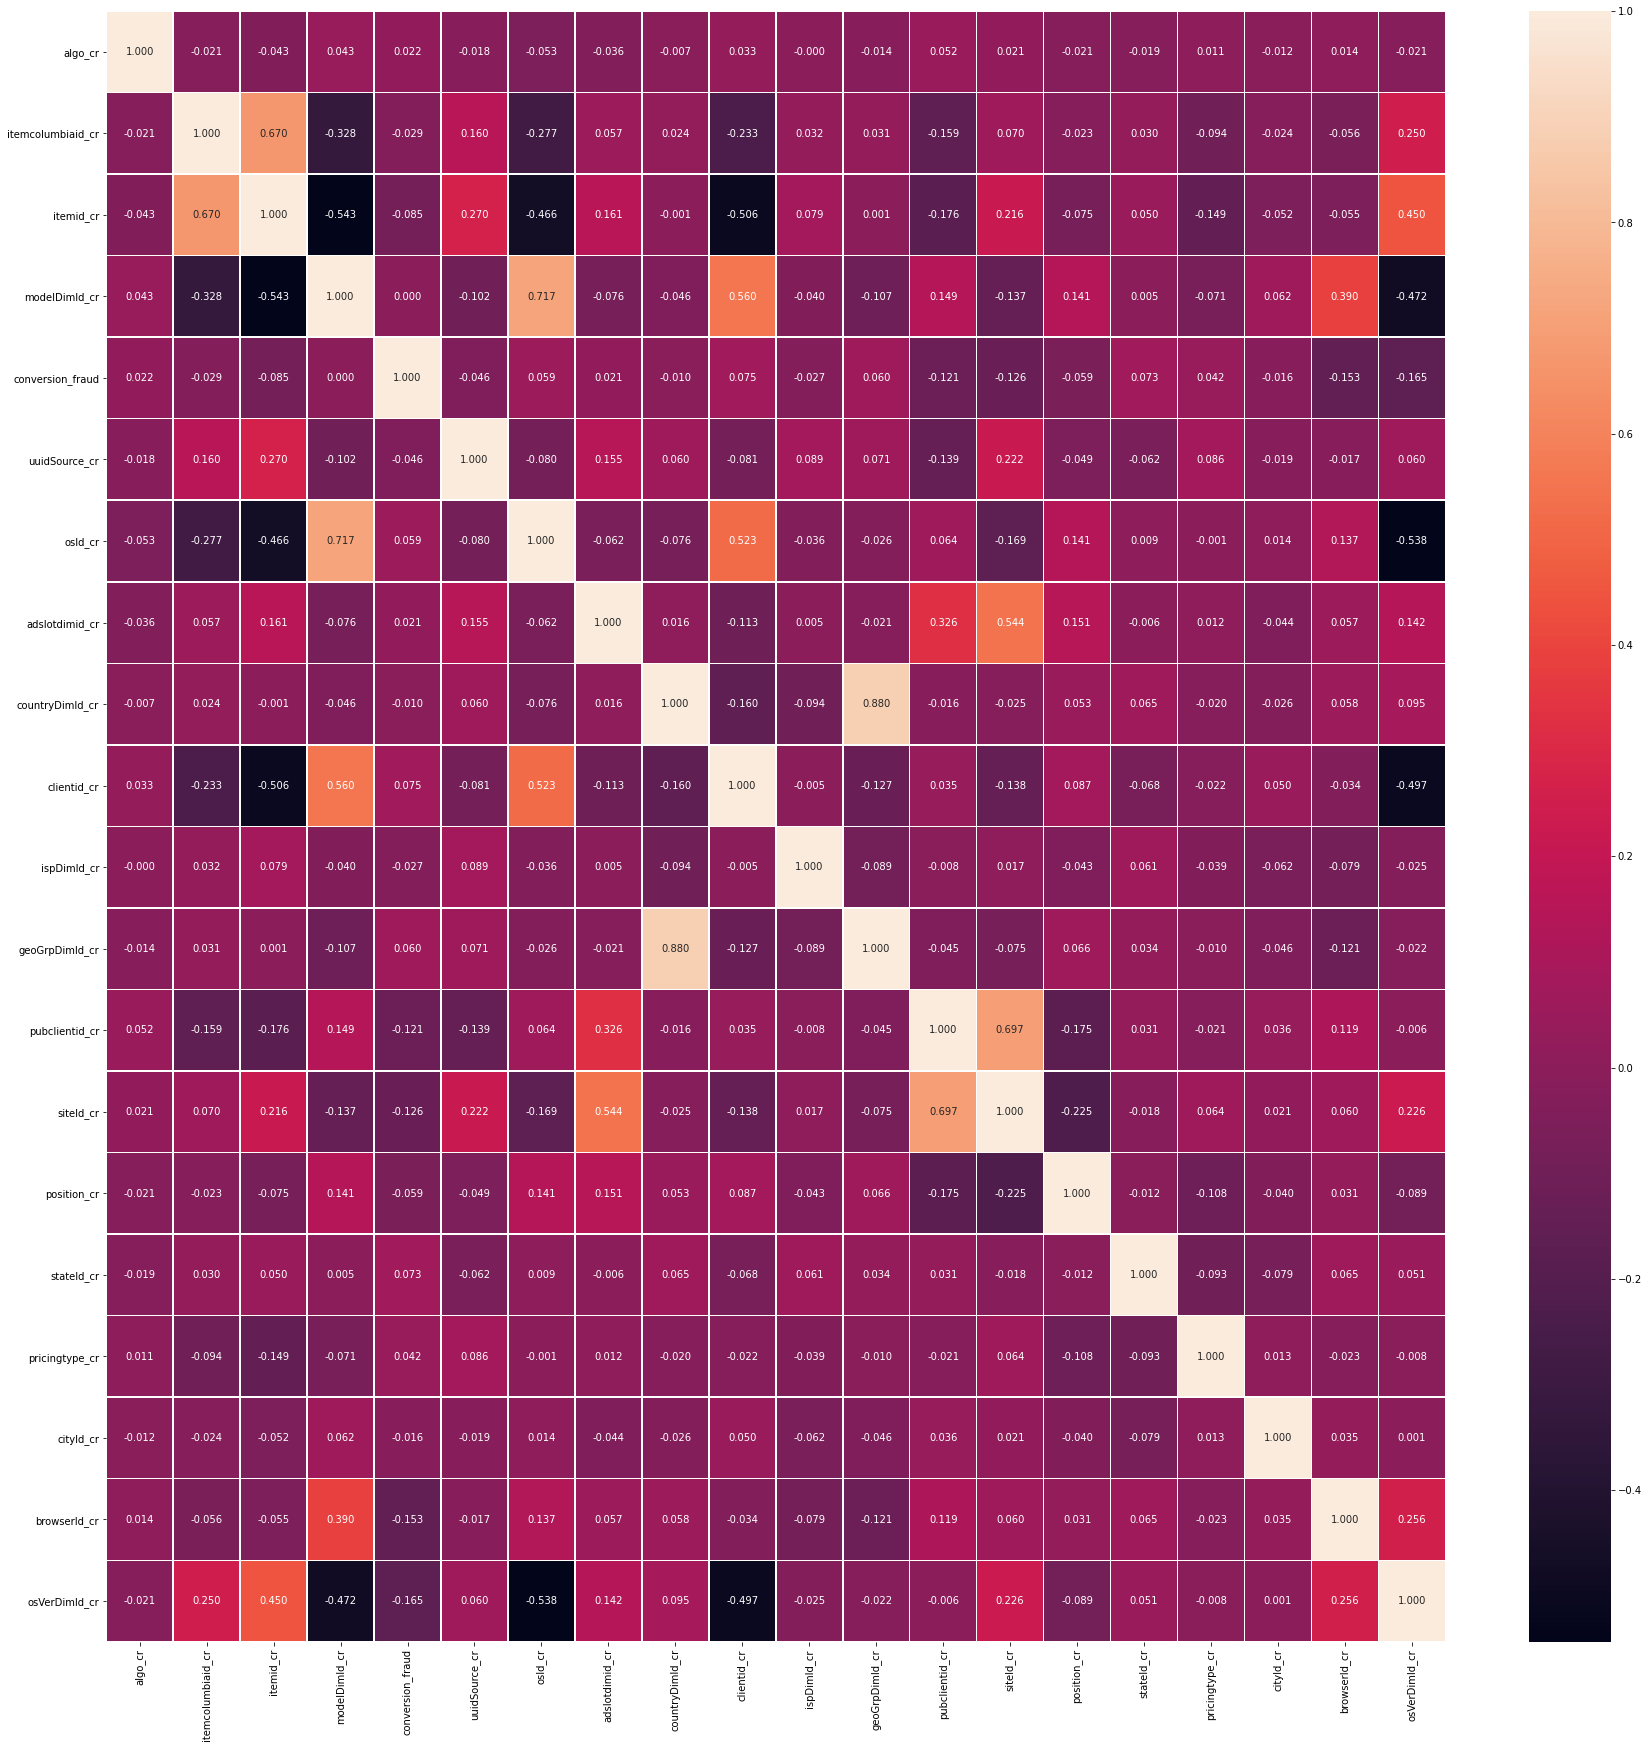

In [545]:
corr = dfo.corr()
f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [546]:
dfo.head()

,algo_cr,itemcolumbiaid_cr,itemid_cr,modelDimId_cr,conversion_fraud,uuidSource_cr,osId_cr,adslotdimid_cr,countryDimId_cr,clientid_cr,ispDimId_cr,geoGrpDimId_cr,connTypeDimId_cr,clmbuserid_cr,pubclientid_cr,siteId_cr,imprid_cr,position_cr,stateId_cr,pricingtype_cr,cityId_cr,browserId_cr,osVerDimId_cr
0,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,144.0,75694,280429.0,348011.0,264496,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,2320,34,01649076-c77f-4d70-afc8-213535427147-1sjd4,1.0,1806.0,16,436.0,129639.0,199452.0
1,38.0,5488773,49504157,202038.0,1,1.0,196058.0,129239,144.0,75694,136127.0,348011.0,264496,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,15240,178,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,1.0,1817.0,16,10314.0,129639.0,199452.0
2,21.0,5488088,49504160,202038.0,1,1.0,196058.0,321554,144.0,75694,172725.0,348011.0,264503,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,2320,34,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,1.0,1812.0,16,0.0,129639.0,199452.0
3,38.0,5488088,49504155,202038.0,1,1.0,196058.0,321300,144.0,75694,136127.0,348011.0,264496,f79f3de7-5edb-4319-9549-117f47996066-10wrk,2320,34,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,1.0,1815.0,16,10300.0,129639.0,199452.0
4,21.0,5614054,53607445,0.0,1,1.0,129311.0,355768,144.0,30431,136127.0,348011.0,264496,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1,3296,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,1.0,1818.0,17,0.0,129408.0,360833.0


In [547]:
dfo=dfo.drop(["clmbuserid_cr","imprid_cr","connTypeDimId_cr"], axis = 1)

In [548]:
dftest=dftest.drop(["clmbuserid_cr","imprid_cr","connTypeDimId_cr"], axis = 1)

In [549]:
dfo.shape

(944, 20)

In [550]:
dftest.shape

(455, 19)

# **Using Tsne ,PCA and truncated Svd to visualize data**

In [551]:
new_df=dfo
X = new_df.drop('conversion_fraud', axis=1)
y =new_df['conversion_fraud']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.0 s
PCA took 0.0083 s
Truncated SVD took 0.0083 s


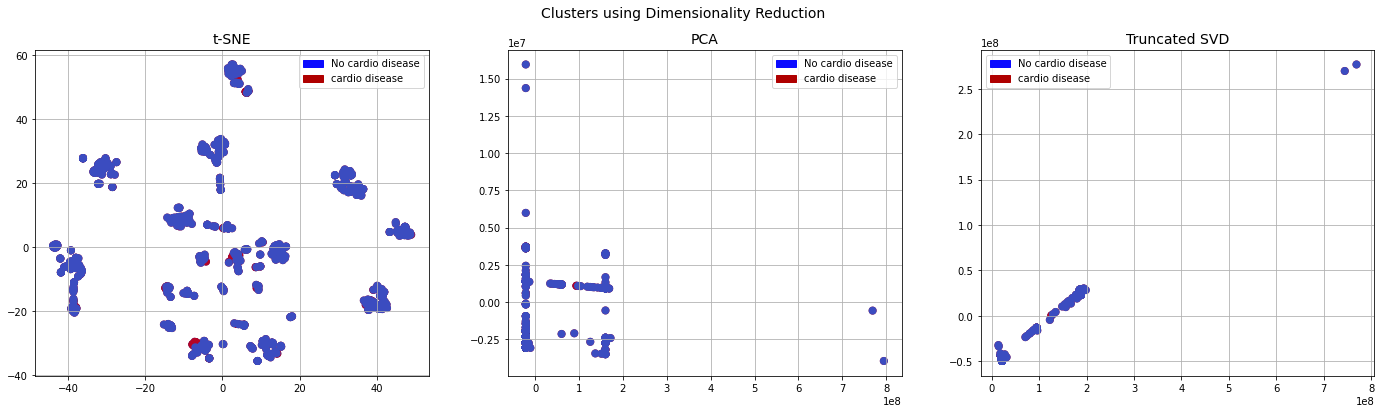

In [552]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No cardio disease')
red_patch = mpatches.Patch(color='#AF0000', label='cardio disease')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='no cardio disease', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

In [553]:
X = dfo.drop(columns=['conversion_fraud'], axis=1)
y =dfo['conversion_fraud']

In [554]:
X.shape

(944, 19)

In [555]:
dftest.shape

(455, 19)

#Preparing Train data

In [556]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [557]:
X.shape

(944, 19)

Models without Hyperparameter tuning

In [558]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [559]:
# Let's implement simple classifiers

ran = RandomForestClassifier(n_estimators=100)

naive = GaussianNB()


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random forest" : ran,
    "Naive bayes" : naive}

Accuracies of models(Random forest showing good results)

In [560]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 86.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 88.0 % accuracy score
Classifiers:  SVC Has a training score of 86.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 80.0 % accuracy score


Cross val accuracy of knn and random forest

In [561]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X_train, y=y_train, cv=10)

In [562]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.9404561403508772
Random Forest Standart Deviation:  0.018762942593681203
KNN Average accuracy:  0.8729122807017544
KNN Standart Deviation:  0.037427940409531985


Confusion matrix function

In [563]:

from sklearn.metrics import confusion_matrix
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Decision Tree with Grid search

In [564]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
    #fit model to data
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [565]:
ydt=dtree_gscv.predict(X_test)

In [566]:
score = accuracy_score(y_test, ydt)
score

0.9153439153439153

Confusion matrix, without normalization
[[164   2]
 [ 14   9]]


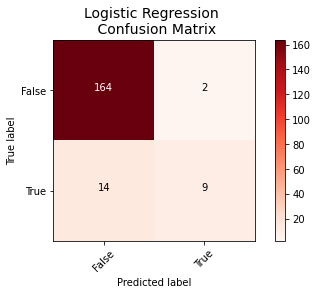

In [571]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ydt)
plot_confusion_matrix(cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

Log regression with Grid search

In [572]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [573]:
ylog=log_reg.predict(X_test)

In [574]:
score = accuracy_score(y_test, ylog)
score

0.8888888888888888

Confusion matrix, without normalization
[[164   2]
 [ 19   4]]


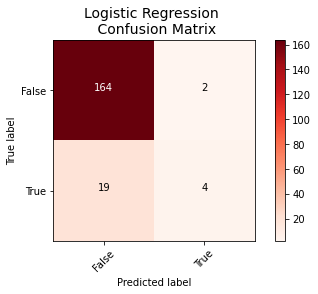

In [575]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ylog)
plot_confusion_matrix(cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

In [576]:
print('LOG REG Classifier:')
print(classification_report(y_test,ylog))

LOG REG Classifier:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       166
           1       0.67      0.17      0.28        23

    accuracy                           0.89       189
   macro avg       0.78      0.58      0.61       189
weighted avg       0.87      0.89      0.86       189



KNN with grid search

In [577]:
knears_params = {"n_neighbors": [1,3,5,7,9,11,13,21,27,33,41,51,99], 'algorithm': ['auto']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [578]:
yknn=knears_neighbors.predict(X_test)

In [579]:
score = accuracy_score(y_test, yknn)
score

0.8783068783068783

Confusion matrix, without normalization
[[158   8]
 [ 15   8]]


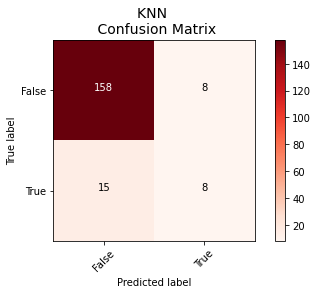

In [581]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yknn)
plot_confusion_matrix(cm, labels, title="KNN \n Confusion Matrix", cmap=plt.cm.Reds)

In [195]:
print('knn Classifier:')
print(classification_report(y_test,yknn))

knn Classifier:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       166
           1       0.50      0.35      0.41        23

    accuracy                           0.88       189
   macro avg       0.71      0.65      0.67       189
weighted avg       0.86      0.88      0.87       189



Random forest Grid Search

In [583]:

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
model = GridSearchCV(RandomForestClassifier(max_features='sqrt'),param_grid,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8452069146149817


In [584]:
randomf = model.best_estimator_
randomf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [585]:

yrf=randomf.predict(X_test)

Confusion matrix, without normalization
[[164   2]
 [ 11  12]]


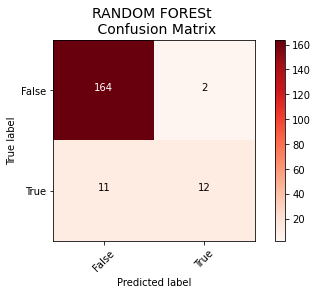

In [587]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yrf)
plot_confusion_matrix(cm, labels, title="RANDOM FORESt \n Confusion Matrix", cmap=plt.cm.Reds)

In [588]:
print('rf Classifier:')
print(classification_report(y_test,yrf))

rf Classifier:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       166
           1       0.86      0.52      0.65        23

    accuracy                           0.93       189
   macro avg       0.90      0.75      0.81       189
weighted avg       0.93      0.93      0.92       189



Cat boost

In [589]:
!pip install catboost

In [590]:
import catboost
clfcb = catboost.CatBoostClassifier(
            n_estimators = 4000,
            task_type = 'CPU',
            one_hot_max_size = 2,
            random_seed = 31,
            loss_function = 'MultiClass',
            learning_rate = 0.8,
            max_depth = 6,
            colsample_bylevel = 0.5,
            bagging_temperature = 28.635664398579774,
            random_strength = 100.0,
            reg_lambda = 100.0,
            early_stopping_rounds=500,
    )

In [591]:
clfcb.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0:	learn: 0.5615576	total: 1.95ms	remaining: 7.78s
1:	learn: 0.5333997	total: 3.7ms	remaining: 7.39s
2:	learn: 0.4896696	total: 5.28ms	remaining: 7.03s
3:	learn: 0.4561492	total: 7.22ms	remaining: 7.21s
4:	learn: 0.4396536	total: 9.12ms	remaining: 7.28s
5:	learn: 0.4219793	total: 11.1ms	remaining: 7.39s
6:	learn: 0.4079142	total: 12.9ms	remaining: 7.36s
7:	learn: 0.3875539	total: 14.7ms	remaining: 7.32s
8:	learn: 0.3755157	total: 16.5ms	remaining: 7.32s
9:	learn: 0.3570955	total: 18.1ms	remaining: 7.24s
10:	learn: 0.3503778	total: 19.8ms	remaining: 7.17s
11:	learn: 0.3476541	total: 21.5ms	remaining: 7.14s
12:	learn: 0.3430047	total: 23.3ms	remaining: 7.15s
13:	learn: 0.3310307	total: 25ms	remaining: 7.11s
14:	learn: 0.3172889	total: 26.5ms	remaining: 7.05s
15:	learn: 0.3127147	total: 28.2ms	remaining: 7.01s
16:	learn: 0.3097380	total: 29.8ms	remaining: 6.98s
17:	learn: 0.3046802	total: 31.6ms	remaining: 6.99s
18:	learn: 0.2989311	total: 33.4ms	remaining: 7.01s
19:	learn: 0.2967257	tota

In [593]:

ycat=clfcb.predict(X_test)

Confusion matrix, without normalization
[[163   3]
 [ 12  11]]


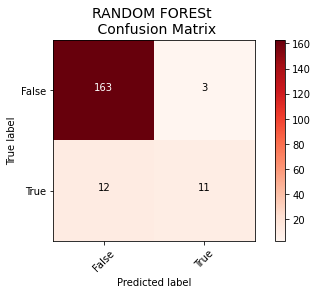

In [594]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, ycat)
plot_confusion_matrix(cm, labels, title="CAT \n Confusion Matrix", cmap=plt.cm.Reds)

In [595]:
print('cat Classifier:')
print(classification_report(y_test,ycat))

cat Classifier:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       166
           1       0.79      0.48      0.59        23

    accuracy                           0.92       189
   macro avg       0.86      0.73      0.78       189
weighted avg       0.91      0.92      0.91       189



XGBOOST

In [596]:
from xgboost import XGBClassifier
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
clf = XGBClassifier(booster='gbtree')
model=GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 3,scoring='roc_auc',return_train_score=True)
model.fit(X_train,y_train)
print('optimal depth : ',model.best_estimator_.max_depth)
print('optimal n_estimator : ',model.best_estimator_.n_estimators)

#optimal depth :  50
#optimal n_estimator :  40

optimal depth :  50
optimal n_estimator :  40


In [597]:
X.dtypes

algo_cr              float64
itemcolumbiaid_cr      int64
itemid_cr              int64
modelDimId_cr        float64
uuidSource_cr        float64
osId_cr              float64
adslotdimid_cr         int64
countryDimId_cr      float64
clientid_cr            int64
ispDimId_cr          float64
geoGrpDimId_cr       float64
pubclientid_cr         int64
siteId_cr              int64
position_cr          float64
stateId_cr           float64
pricingtype_cr         int64
cityId_cr            float64
browserId_cr         float64
osVerDimId_cr        float64
dtype: object

In [598]:
xgb= model.best_estimator_
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [599]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [600]:
yxg=xgb.predict(X_test)

In [601]:
score = accuracy_score(y_test, yxg)
score

0.91005291005291

Confusion matrix, without normalization
[[164   2]
 [ 15   8]]


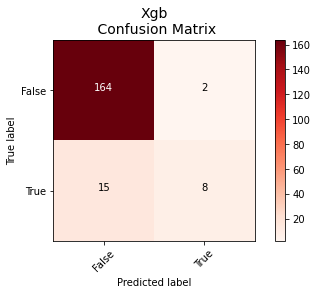

In [603]:
labels = ['False', 'True']
cm = confusion_matrix(y_test, yxg)
plot_confusion_matrix(cm, labels, title="Xgb\n Confusion Matrix", cmap=plt.cm.Reds)

In [604]:


print('xgboost Classifier:')
print(classification_report(y_test,yxg))

xgboost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       166
           1       0.80      0.35      0.48        23

    accuracy                           0.91       189
   macro avg       0.86      0.67      0.72       189
weighted avg       0.90      0.91      0.89       189



In [605]:
dftest.head()

,browserId_cr,ispDimId_cr,cityId_cr,stateId_cr,adslotdimid_cr,itemcolumbiaid_cr,countryDimId_cr,osVerDimId_cr,pubclientid_cr,itemid_cr,clientid_cr,osId_cr,pricingtype_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,2442,233531,5526656,145,0,2658,53184285,82122,196061,16,0,38,348012,3,1,3
1,129639,280429,10278,1808,356952,5488773,144,199414,85030,49504162,75694,196063,16,202038,20,348011,3290,1,1
2,129639,280429,10278,1808,356952,5488088,144,199414,85030,49504161,75694,196063,16,202038,18,348011,3290,1,1
3,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1
4,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1


# We will be using random forest due to high accuracy,precision,recall and f1 score

In [606]:
dff=pd.read_csv("/content/drive/MyDrive/data/Test Data.csv")

In [607]:
dff.head()

,record_id,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494.0,265618,145,0,1,348012,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.1,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.1,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0


In [608]:
n=dff["record_id"]

In [609]:
dff.head()



,record_id,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,5526656,53184285,3,2658,3,2946.0,8628,16,196061,0,0,2442,0,264494.0,265618,145,0,1,348012,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,3.1,5488773,49504162,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,3.1,5488088,49504161,1,85030,3290,5167.0,6384,16,196063,129639,10278,1808,202038,264496.0,280429,144,199414,1,348011,348020.0,348006.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,5614054,53607445,1,1,3296,NaN,3370,17,129311,129408,10239,1801,0,264496.0,280429,144,360833,1,348011,348025.0,348010.0


In [610]:
dff=pd.DataFrame(dff)


In [612]:
X.shape

(944, 19)

In [614]:
dftest.shape

(455, 19)

In [615]:
dftest

,browserId_cr,ispDimId_cr,cityId_cr,stateId_cr,adslotdimid_cr,itemcolumbiaid_cr,countryDimId_cr,osVerDimId_cr,pubclientid_cr,itemid_cr,clientid_cr,osId_cr,pricingtype_cr,modelDimId_cr,algo_cr,geoGrpDimId_cr,siteId_cr,uuidSource_cr,position_cr
0,0,265618,0,2442,233531,5526656,145,0,2658,53184285,82122,196061,16,0,38,348012,3,1,3
1,129639,280429,10278,1808,356952,5488773,144,199414,85030,49504162,75694,196063,16,202038,20,348011,3290,1,1
2,129639,280429,10278,1808,356952,5488088,144,199414,85030,49504161,75694,196063,16,202038,18,348011,3290,1,1
3,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1
4,129408,280429,10239,1801,355768,5614054,144,360833,1,53607445,30431,129311,17,0,21,348011,3296,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,129639,266906,0,1808,332783,5488773,144,199452,2658,49504155,75694,196058,16,202038,20,348011,3,1,181581299
451,129639,133765,438,1818,129239,5488773,144,199522,15240,49504157,75694,129300,16,202038,20,348011,178,1,1
452,129639,147570,10313,1817,129237,5488773,144,199452,15240,49504154,75694,196058,16,202038,37,348011,178,1,1
453,129433,273302,0,1803,334760,5601460,144,360833,76969,52820721,8895,129311,17,0,2,348011,2923,1,3


In [616]:
dftest.shape

(455, 19)

In [617]:
X.shape

(944, 19)

In [618]:
X.columns

Index(['algo_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'modelDimId_cr',
       'uuidSource_cr', 'osId_cr', 'adslotdimid_cr', 'countryDimId_cr',
       'clientid_cr', 'ispDimId_cr', 'geoGrpDimId_cr', 'pubclientid_cr',
       'siteId_cr', 'position_cr', 'stateId_cr', 'pricingtype_cr', 'cityId_cr',
       'browserId_cr', 'osVerDimId_cr'],
      dtype='object')

In [619]:
dftest=dftest[['algo_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'modelDimId_cr',
       'uuidSource_cr', 'osId_cr', 'adslotdimid_cr', 'countryDimId_cr',
       'clientid_cr', 'ispDimId_cr', 'geoGrpDimId_cr', 'pubclientid_cr',
       'siteId_cr', 'position_cr', 'stateId_cr', 'pricingtype_cr', 'cityId_cr',
       'browserId_cr', 'osVerDimId_cr']]

Using random forest for final prediction

In [632]:
yf=ran.predict(dftest)


In [633]:
yf

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [635]:
k=[]
for i in yf:
  if i==1:
    k.append("TRUE")
  elif i==0:
    k.append("FALSE")



In [636]:
k

['TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'TRUE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE',
 'FALSE'

In [639]:
n

0      1000
1      1001
2      1002
3      1003
4      1004
       ... 
450    1450
451    1451
452    1452
453    1453
454    1454
Name: record_id, Length: 455, dtype: int64

In [640]:
dfff = pd.DataFrame(list(zip(n, k)),
               columns =['record_id', 'conversion_fraud'])


In [641]:
dfff

,record_id,conversion_fraud
0,1000,TRUE
1,1001,FALSE
2,1002,TRUE
3,1003,FALSE
4,1004,FALSE
...,...,...
450,1450,FALSE
451,1451,FALSE
452,1452,FALSE
453,1453,FALSE


In [643]:
dfff.to_csv('final2.csv',index=False)

## Random forest with or without gives fairly similar accuracy so anyone can be used in the final model.**bold text**